## PCA

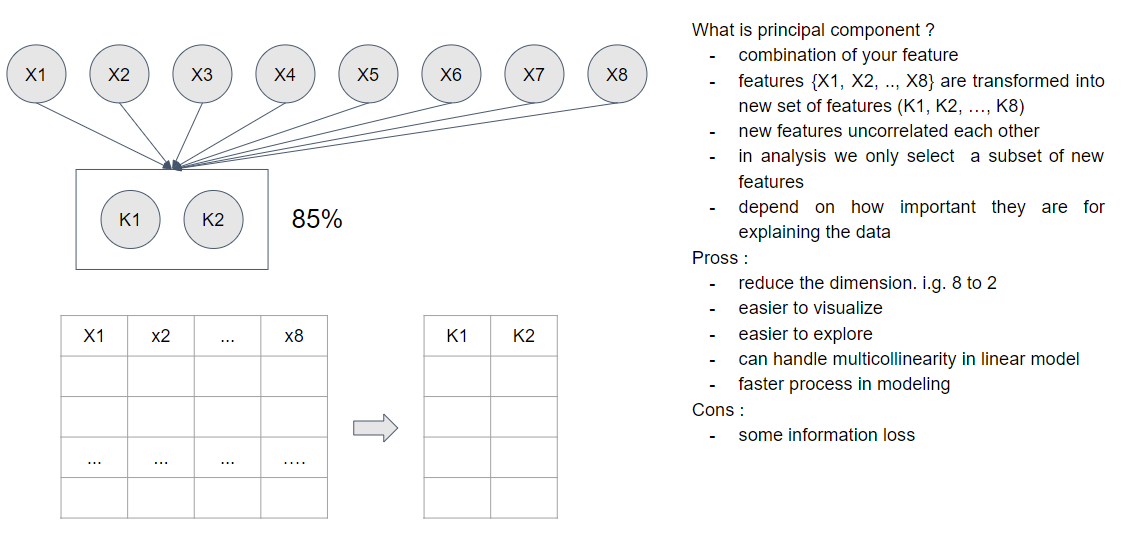

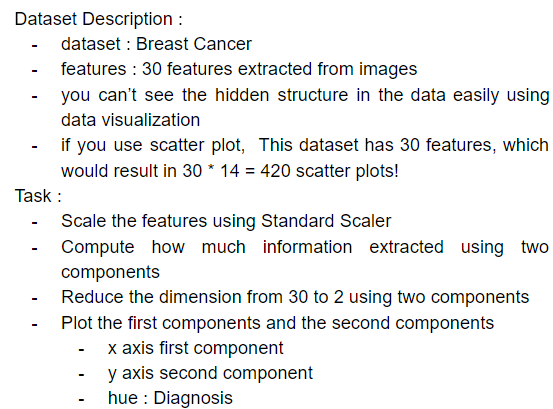

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()

In [2]:
cancer_df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
cancer_df['diagnosis'] = cancer['target']

In [3]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
scaler = StandardScaler()
scaler.fit(cancer_df.drop('diagnosis', axis=1))
X_scaled = scaler.transform(cancer_df.drop('diagnosis', axis=1))
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [5]:
X_scaled.shape

(569, 30)

In [6]:
from sklearn.decomposition import PCA

## Information Extraction

In [7]:
# 30 components
pca = PCA(n_components=30)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)

In [8]:
np.sum(pca.explained_variance_ratio_)

1.0

In [9]:
np.sum(pca.explained_variance_ratio_[:2])

0.6324320765155941

## Reducing Dimension (30 to 2)

In [10]:
pca2 = PCA(n_components=2)
pca2.fit(X_scaled)

X_pca_2 = pca2.transform(X_scaled)

In [11]:
print('Original Shape: {}'.format(str(X_scaled.shape)))
print('Reduced Shape: {}'.format(str(X_pca_2.shape)))

Original Shape: (569, 30)
Reduced Shape: (569, 2)


In [12]:
np.sum(pca2.explained_variance_ratio_)

0.6324320765155952

In [13]:
pca.components_[:2]

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [14]:
pca2.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

## Scatterplot

C:\Users\johan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Second Component')

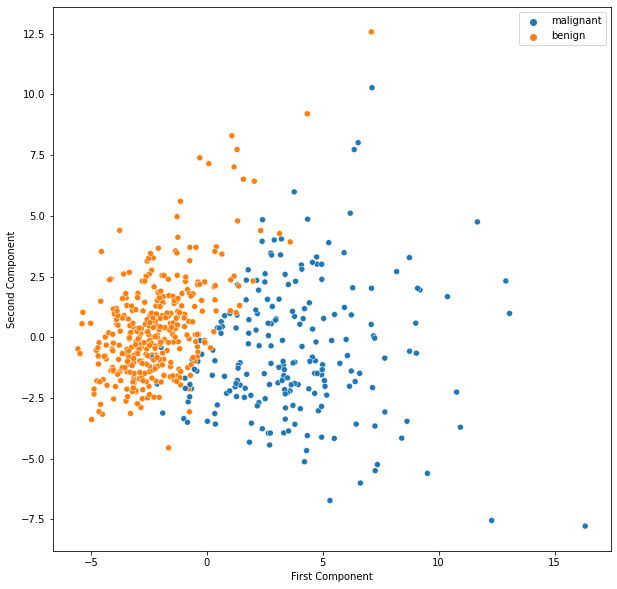

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.scatterplot(X_pca_2[:,0], X_pca_2[:,1], hue=np.where(cancer_df['diagnosis']==1, 'benign', 'malignant'))
plt.xlabel('First Component')
plt.ylabel('Second Component')

Result :
- Information extracted from 2 component 63.24 % 
- We reduce the dimension from 30 to 2 and the lost information is 36.76% but you can see that those two features can separate benign and malignant quiet well
- this also means that you can see hidden structure within the data
- malignant points are more spread than benign point


In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
pc_df = pd.DataFrame(X_pca_2, columns=['PC1', 'PC2'])
pc_df['target'] = cancer_df['diagnosis']

In [18]:
pc_df

,PC1,PC2,target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0
...,...,...,...
564,6.439315,-3.576817,0
565,3.793382,-3.584048,0
566,1.256179,-1.902297,0
567,10.374794,1.672010,0


In [19]:
X = pc_df.drop('target', axis=1)
y = pc_df['target']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=1)

In [21]:
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [22]:
from sklearn.metrics import classification_report

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        42
           1       0.96      0.96      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



# Clustering K Means

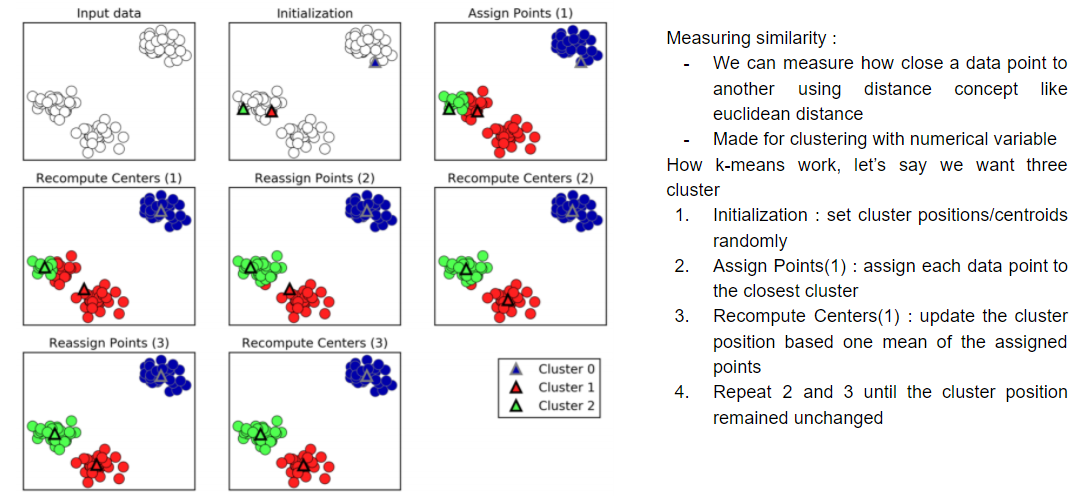

In [24]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
X, y = make_blobs(random_state=42)

In [26]:
X.shape

(100, 2)

C:\Users\johan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


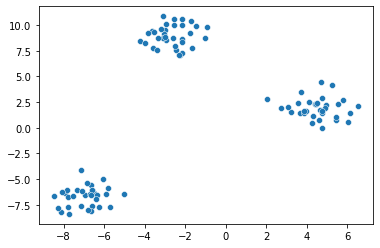

In [27]:
sns.scatterplot(X[:,0], X[:,1])
plt.show()

In [28]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [29]:
kmeans.labels_

array([0, 2, 1, 2, 0, 2, 1, 2, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 2, 0, 0, 0, 0, 2, 2, 0, 1, 1, 1, 1, 2, 2, 0, 1, 2, 1,
       1, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 1, 0, 2, 0, 2, 0, 0,
       2, 0, 2, 2, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 1, 2, 1, 0, 1, 1, 1, 2,
       1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 0, 1])

C:\Users\johan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


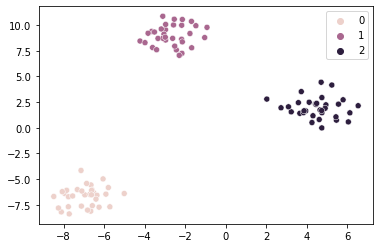

In [30]:
sns.scatterplot(X[:,0], X[:,1], hue=kmeans.labels_)

## Baru lagi

In [33]:
df = pd.read_csv('ilustrasi k means.csv',delimiter=';')
df

,tinggibadan,tinggibadanistri
0,175,175
1,178,178
2,175,166
3,180,179
4,185,181
5,178,163
6,175,158
7,181,154
8,168,155
9,171,154


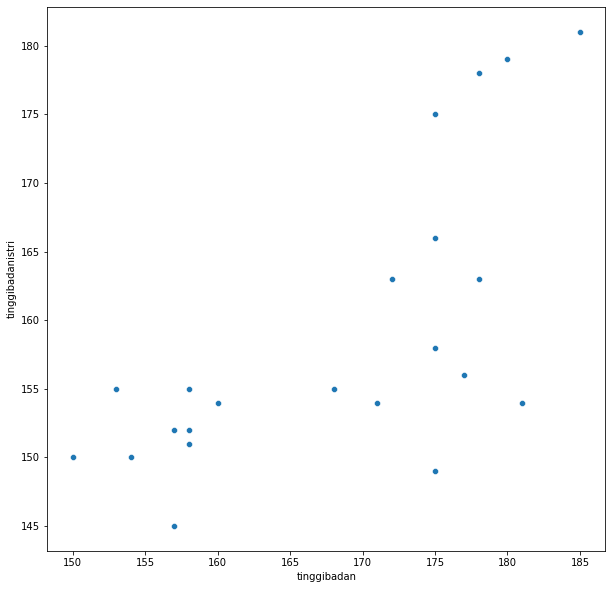

In [35]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='tinggibadan',y='tinggibadanistri',data=df)
plt.show()

## Determine the Optimal Number of Cluster

In [37]:
X = df.copy()

In [65]:
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

number_of_clusters = range(2,11)
clusterings = [KMeans(n_clusters=k).fit(X) for k in number_of_clusters]
centroids = [k.cluster_centers_ for k in clusterings]

D_k = [cdist(X,cent,'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

C:\Users\johan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\johan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


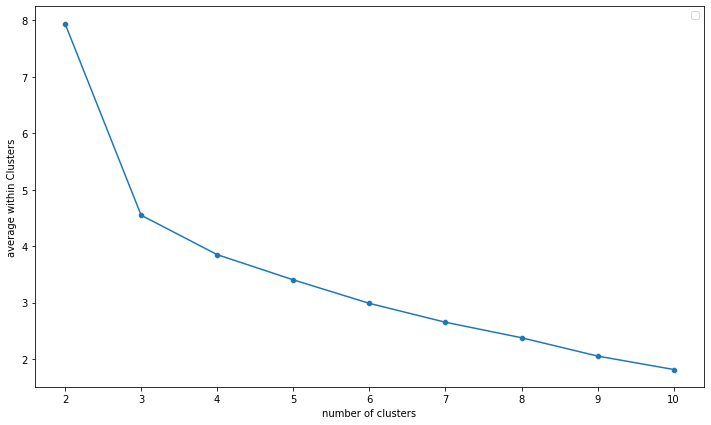

In [51]:
plt.figure(figsize=(12,7))
sns.lineplot(number_of_clusters, avgWithinSS)
sns.scatterplot(number_of_clusters, avgWithinSS)
plt.xticks(number_of_clusters)
plt.xlabel('number of clusters')
plt.ylabel('average within Clusters')
plt.legend()
plt.show()

C:\Users\johan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\johan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


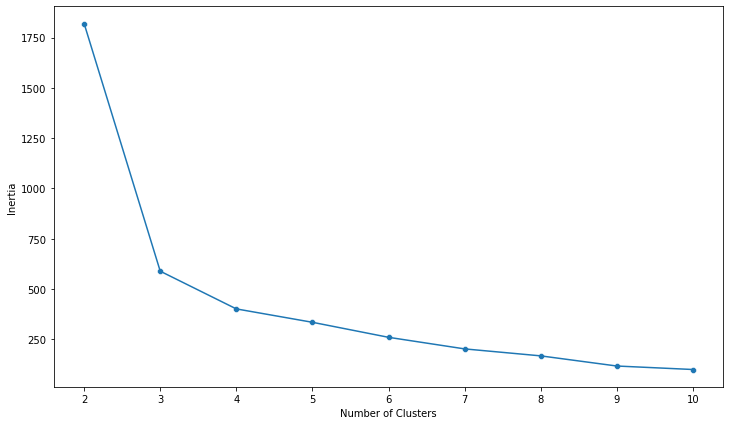

In [50]:
inertia = [KMeans(n_clusters=k).fit(X).inertia_ for k in number_of_clusters]

plt.figure(figsize=(12,7))

sns.lineplot(number_of_clusters, inertia)
sns.scatterplot(number_of_clusters, inertia)

plt.xticks(number_of_clusters)

plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


## Silhouette Score

In [57]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [58]:
labels = kmeans.labels_
silhouette_score(X,labels, metric='euclidean')

0.6172319390416597

In [60]:
silhouette_scores=[]
number_of_clusters = range(2,11)
for i in number_of_clusters:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X,labels,metric='euclidean'))

C:\Users\johan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\johan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


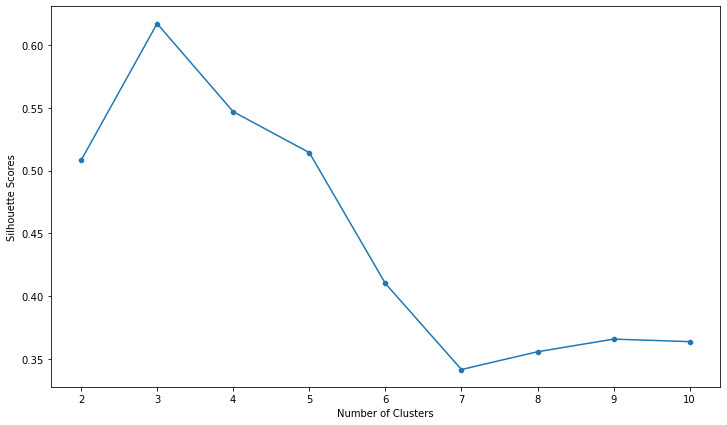

In [61]:
plt.figure(figsize=(12,7))

sns.lineplot(number_of_clusters, silhouette_scores)
sns.scatterplot(number_of_clusters, silhouette_scores)

plt.xticks(number_of_clusters)

plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Scores')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5080353833629737
For n_clusters = 3 The average silhouette_score is : 0.6172319390416597
For n_clusters = 4 The average silhouette_score is : 0.5469497456399819
For n_clusters = 5 The average silhouette_score is : 0.4111440672930426


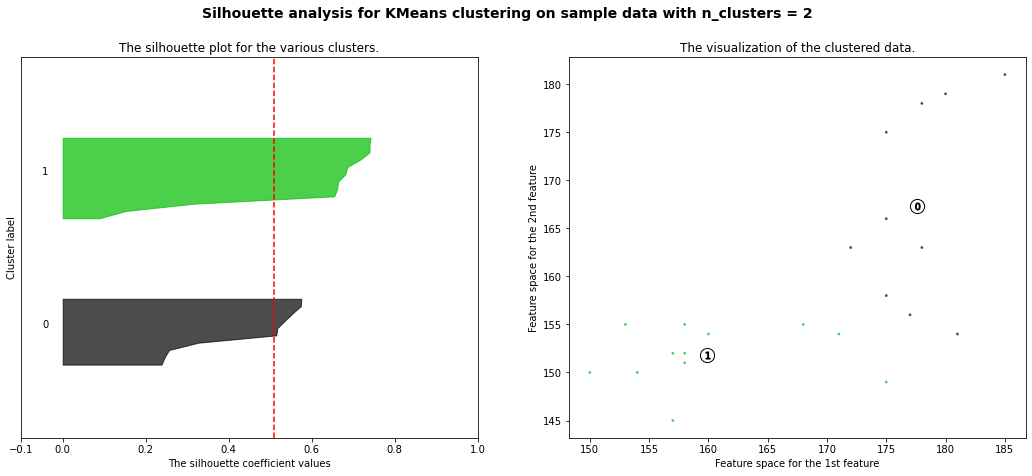

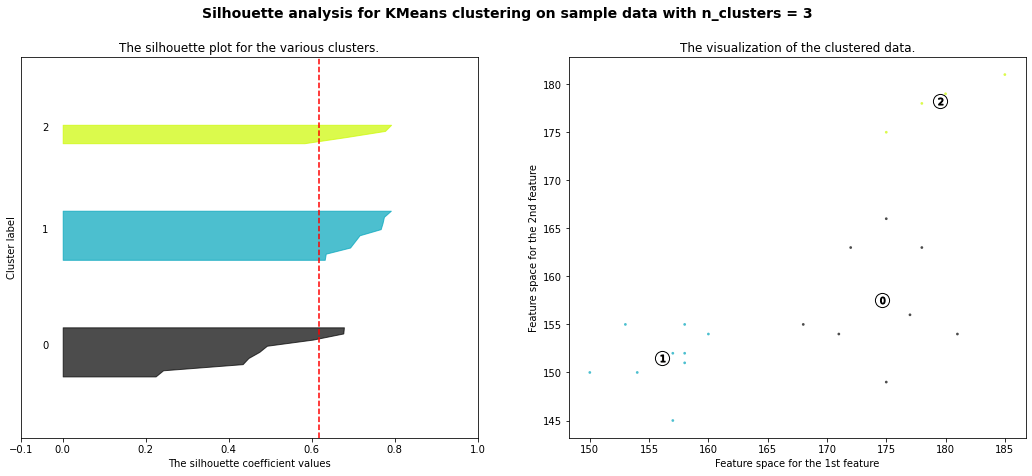

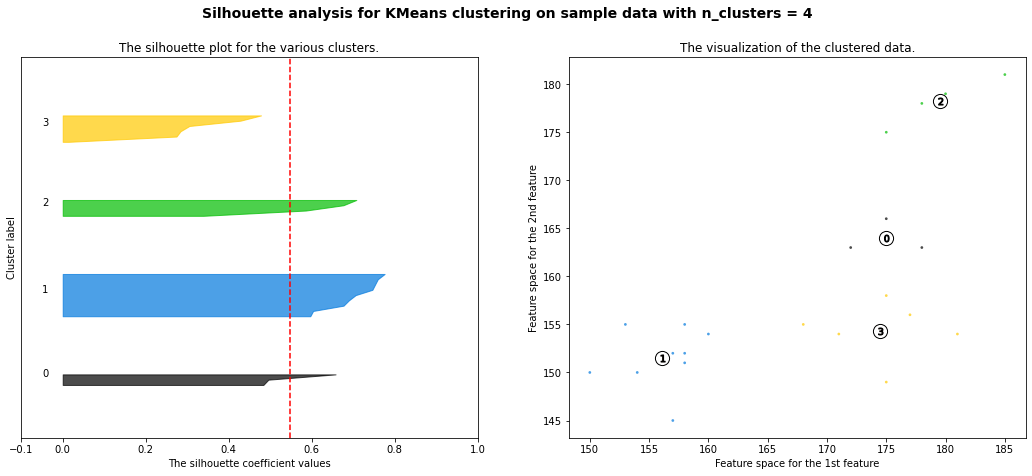

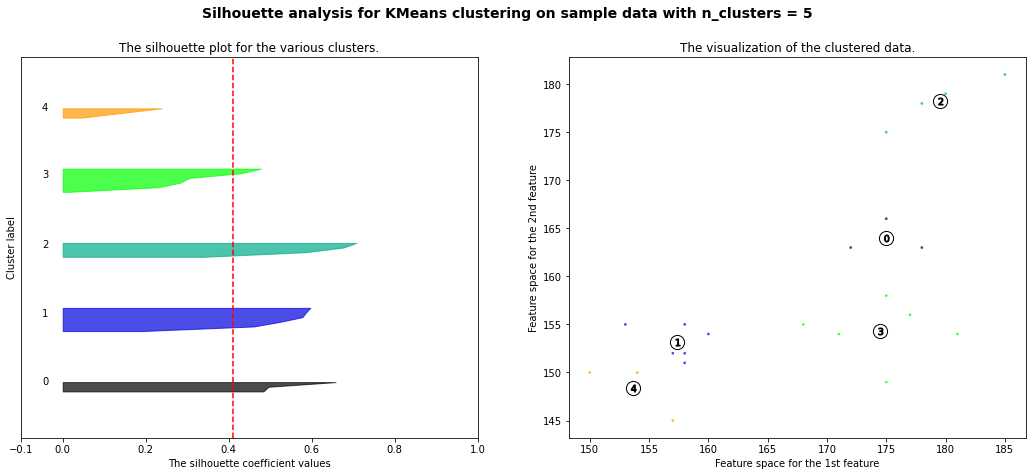

In [68]:
for n_clusters in range(2,6):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X['tinggibadan'], X['tinggibadanistri'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [69]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [70]:
df['cluster']=kmeans.labels_

In [72]:
df

,tinggibadan,tinggibadanistri,cluster
0,175,175,2
1,178,178,2
2,175,166,1
3,180,179,2
4,185,181,2
5,178,163,1
6,175,158,1
7,181,154,1
8,168,155,1
9,171,154,1


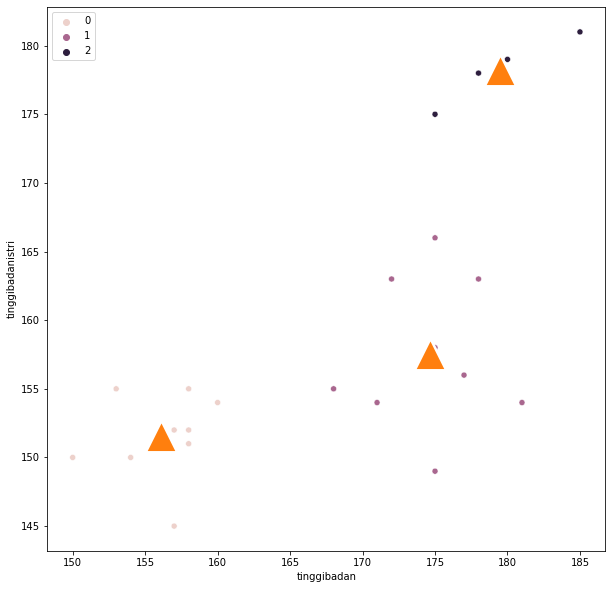

In [77]:
plt.figure(figsize=(10,10))

sns.scatterplot(x='tinggibadan',y='tinggibadanistri',hue='cluster',data=df)
sns.scatterplot(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],s=1000,marker='^')
plt.show()